# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [16]:
# a)
df['mean'] = df.mean(axis=1)
df['diff'] = df.p2-df.p1
# df.style.format(precision=1, decimal='.')

In [17]:
# b)
df[['p1', 'p2']].corr()

,p1,p2
p1,1.000000,0.895737
p2,0.895737,1.000000


In [18]:
# c)
df[['mean', 'diff']].corr()

,mean,diff
mean,1.000000,0.349378
diff,0.349378,1.000000


d) A correlação entre os valores de P1 e P2 foi substancialmente (mais que o dobro) maior que a correlação entre a média e a evoluçã, isso é de se esperar já que os valores das notas variam de 0 a 10, assim como os valores da média, já a evolução (diff), porém, possui valores que variam de -10 a 10.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [29]:
df['sum'] = df.p1 + df.p2
df[['sum', 'diff']].corr()

,sum,diff
sum,1.000000,0.133474
diff,0.133474,1.000000


Novamente, a correlação entre a soma e a diferença caiu, pois a evolução possui valores que vão de -10 a 10, já a soma possui valores que vão de 0 a 20, ou seja, a diferença entre o maior e menor valor possível é de 30.

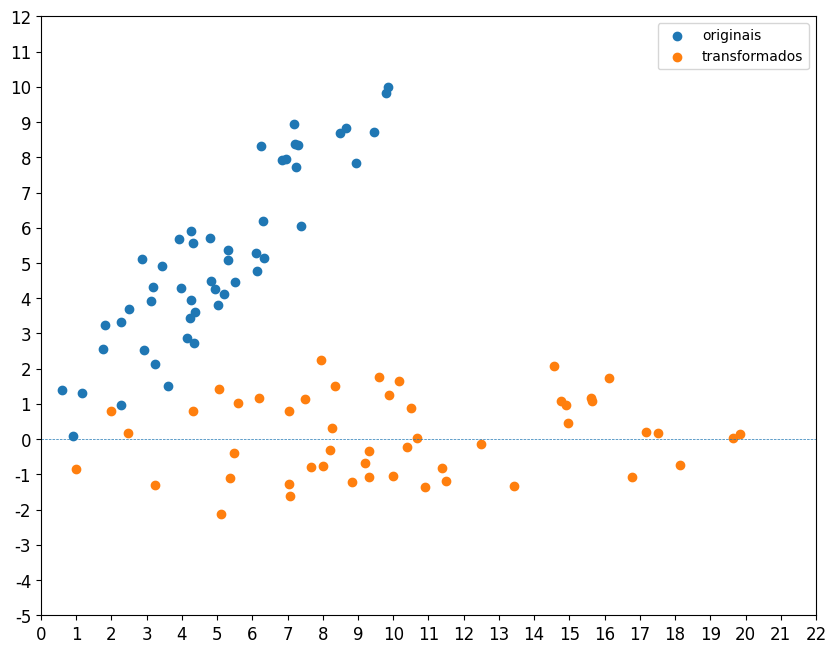

In [43]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = 22
ymin = -5
ymax = 12

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df['sum'], df['diff'], label='transformados')
# Obs: Neste gráfico, os valores de soma estão no eixo x, enquanto os de subtração estão no eixo y
#Legenda
plt.legend()